## Q1 calclulating average sum of dice roll

In [1]:
import random

In [2]:
#Monte Carlo Simulation for dice rolls

dice = [1, 2, 3, 4, 5, 6]                    #outcomes of a dice roll

num_simulations = 1000

sum = 0                                     #cumulative sum of all die rolls to calculate the average
for i in range(num_simulations):
  current_roll = random.choice(dice)        #selecting a random number from the list depicting a dice roll
  sum += current_roll

print( " Average of the dice rolls is " + str(sum/num_simulations) )

 Average of the dice rolls is 3.482


## Q2 expected number of dice rolls until you get your first six by prob ans=6

In [3]:
dice = [1, 2, 3, 4, 5, 6]                  

num_simulations = 10000
sum = 0
for i in range(num_simulations):
    k=0
    p=0
    while (p!=6):
        k=k+1
        p=random.choice(dice)
    sum+=k     
print( " Average of the dice rolls is " + str(sum/num_simulations) )    
     
        
    

 Average of the dice rolls is 5.9212


# Getting to stocks

In [4]:
import yfinance as yf
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
df=yf.download('TSLA',start='2022-8-19')

[*********************100%%**********************]  1 of 1 completed


In [6]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-19,299.000000,300.359985,292.500000,296.666656,296.666656,61395300
2022-08-22,291.913330,292.399994,286.296661,289.913330,289.913330,55843200
2022-08-23,291.453339,298.826660,287.923340,296.453339,296.453339,63984900
2022-08-24,297.563324,303.646667,296.500000,297.096680,297.096680,57259800
2022-08-25,302.359985,302.959991,291.600006,296.070007,296.070007,53230000
...,...,...,...,...,...,...
2023-08-31,255.979996,261.179993,255.050003,258.079987,258.079987,108861700
2023-09-01,257.260010,259.079987,242.009995,245.009995,245.009995,132272500
2023-09-05,245.000000,258.000000,244.860001,256.489990,256.489990,129469600


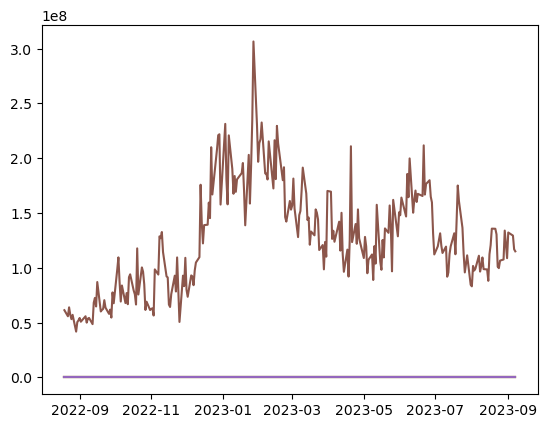

In [7]:
plt.plot(df)

In [8]:
import pandas as pd
returns=np.log(1+df['Adj Close'].pct_change())

In [9]:
returns.head()

Date
2022-08-19         NaN
2022-08-22   -0.023027
2022-08-23    0.022308
2022-08-24    0.002168
2022-08-25   -0.003462
Name: Adj Close, dtype: float64

In [10]:
# calculating u and sigma
u,sigma=returns.mean(),returns.std()
u


-0.0006281592798795113

In [11]:
np.random.normal(u,sigma) # a single number generated

-0.05364026110394874

In [12]:
p=np.random.normal(u,sigma,252)
p


array([ 6.61871097e-02, -1.43948782e-02, -4.79948294e-02,  9.19704986e-03,
       -6.11140572e-02, -3.28638242e-02, -1.83199908e-02,  7.41959198e-02,
       -1.77178804e-02, -3.60280207e-02, -3.04375858e-03, -4.10037963e-02,
        2.31206357e-02,  5.43547508e-02, -1.09945639e-02, -3.93192147e-02,
        6.22109283e-02,  3.69028510e-02,  1.18769472e-02, -2.28322360e-02,
       -4.90080525e-02, -5.07139829e-02, -1.66642945e-02, -2.64026506e-02,
       -7.34289825e-02, -5.02495792e-02, -2.81921826e-03, -9.01051003e-03,
       -3.18220409e-02, -1.49388451e-02,  3.10664604e-02, -1.93828244e-02,
        4.36102544e-02,  4.50744352e-02,  5.43231598e-02, -3.99235810e-03,
        9.61705884e-02,  1.08080976e-02, -7.78886252e-03, -2.76123274e-02,
       -6.67129131e-02, -1.79218272e-02, -9.63691724e-03, -4.01163033e-02,
       -1.97958443e-02,  1.42299477e-02,  8.54401256e-03,  6.44510376e-02,
        5.85834487e-03,  1.23205026e-02, -6.97899083e-02,  3.58820423e-02,
       -5.27102669e-02, -

In [13]:
initial=df['Adj Close'].iloc[-1]

In [14]:
# exponent and compounding
np.exp(1)

2.718281828459045

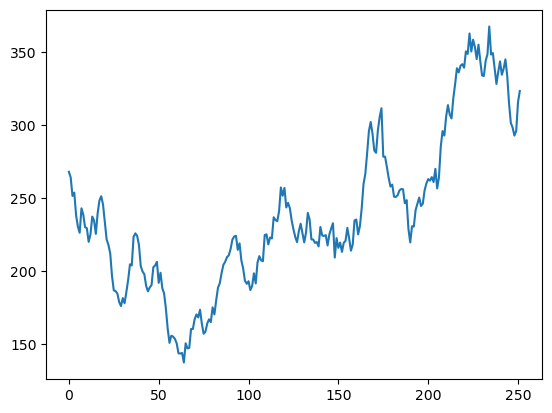

In [15]:
prices=initial*(1+p).cumprod()
plt.plot(prices)

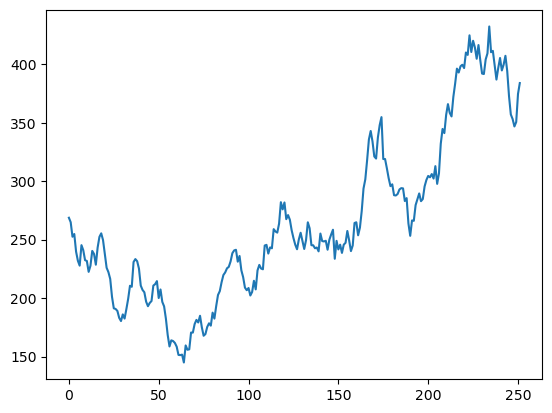

In [16]:
prices=initial*(np.exp(p.cumsum()))    
plt.plot(prices)

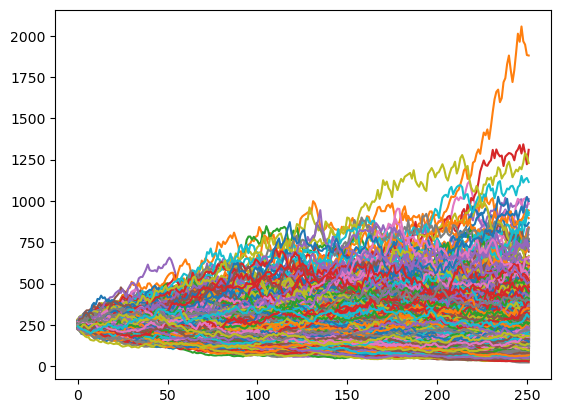

In [17]:
for i in range(1000):
    p=np.random.normal(u,sigma,252)
    prices=initial*(np.exp(p.cumsum())) 
    
    plt.plot(prices)
    
    

In [18]:
import math
from scipy.stats import norm

In [19]:
def option_price (ticker,initial,iterations,risk_free_rate,strike_price):
    df=yf.download(ticker,start='2022-8-19')
    returns=np.log(1+df['Adj Close'].pct_change())
    
    u,var,sigma=returns.mean(),returns.var(),returns.std()
    print('u=',u)
    sum=0
    for i in range(iterations):
        p=np.random.rand(252)
        z=norm.ppf(p)
        prices=initial*np.exp((u-var/2 + sigma*z).cumsum())
        plt.plot(prices)
        
        if (prices[-1]>=strike_price):
            sum=sum+prices[-1]-strike_price
    sum=sum/iterations
    print ('The time discounted payoff and hence price of option is', sum*math.exp(-risk_free_rate))

[*********************100%%**********************]  1 of 1 completed
u= 0.00015408213442573939
The time discounted payoff and hence price of option is 6.869384614236188


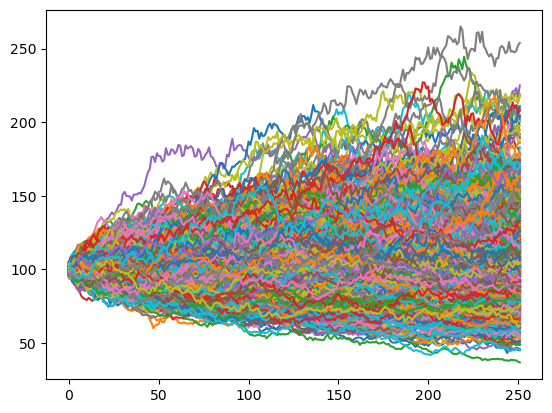

In [20]:
option_price("AAPL",100,1000,0.02,120)